# (12.3.) Simulating an Ordinary Differential Equation with SciPy

１元１次微分方程式:
\begin{align}
\ddot{\varphi}+\frac{3}{2 t} \dot{\varphi}-\alpha M^{4+\alpha} \varphi^{-\alpha-1}=0
\end{align}
の数値計算。

Let's import NumPy, SciPy (`integrate` package), and matplotlib.

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
%matplotlib inline

### matplotlibの日本語対応

In [2]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'IPAexGothic'

### 表示を$\LaTeX$に

（ブラケットとかどうしたらいいのか。スタイルファイル追加したいなぁ）

In [3]:
import sympy as sp
sp.init_printing()

2. We define a few parameters appearing in our model.

In [4]:
M = 1.  # particle's mass

3. We have two variables: `t`  (one dimension).
We note $\mathbf{x}=(x)$. The ODE we are going to simulate is:

$$\ddot{\varphi}+\frac{3}{2 t} \dot{\varphi}-\alpha M^{4+\alpha} \varphi^{-\alpha-1}=0$$
$\phi(t) \to x(t)$として、
$$
\ddot{x}+\frac{3}{2 t} \dot{x}-\alpha M^{4+\alpha} x^{-\alpha-1}=0$$
の微分方程式をとく。

 In order to simulate this second-order ODE with SciPy, we can convert it to a first-order ODE (another option would be to solve $\dot{x}$ first before integrating the solution). To do this, we consider two 1D variables: $x$ and $\dot{x}$. We note $\mathbf{v} = (x, \dot{x})$. We can express $\dot{x}$ as a function of $x$.   
 Now, we create the initial vector $\mathbf{v}_0$ at time $t=0$: it has two components.

In [5]:
# The initial position is (0, 0).
v0 = np.zeros(2)
# The initial speed vector is oriented
# to the top right.
v0[0] =1
v0[1] = 0.1

In [6]:
v0

array([1. , 0.1])

 We need to create a Python function $f$ that takes the current vector $\mathbf{v}(t_0)$ and a time $t_0$ as argument (with optional parameters), and that returns the derivative $\dot{\mathbf{v}}(t_0)$.

In [7]:
def f(v, t0, alpha):# alpha is parameter of demension, and positive 
    # v has four components: v=[u, u'].
    bfx = v[0] 
    bfxdot = v[1]
    # We compute the second derivative u'' of u.
    bfxdotdot= -3/(2*t0)* bfxdot +alpha * M**(4+alpha) * bfx**(-alpha -1.)
    # We return v'=[x', x"].
    return np.r_[bfxdot, bfxdotdot]

3. Now, we simulate the system for different values of $k$. We use the SciPy function `odeint`, defined in the `scipy.integrate` package.

In [8]:
t = np.linspace(1., 20., 100)

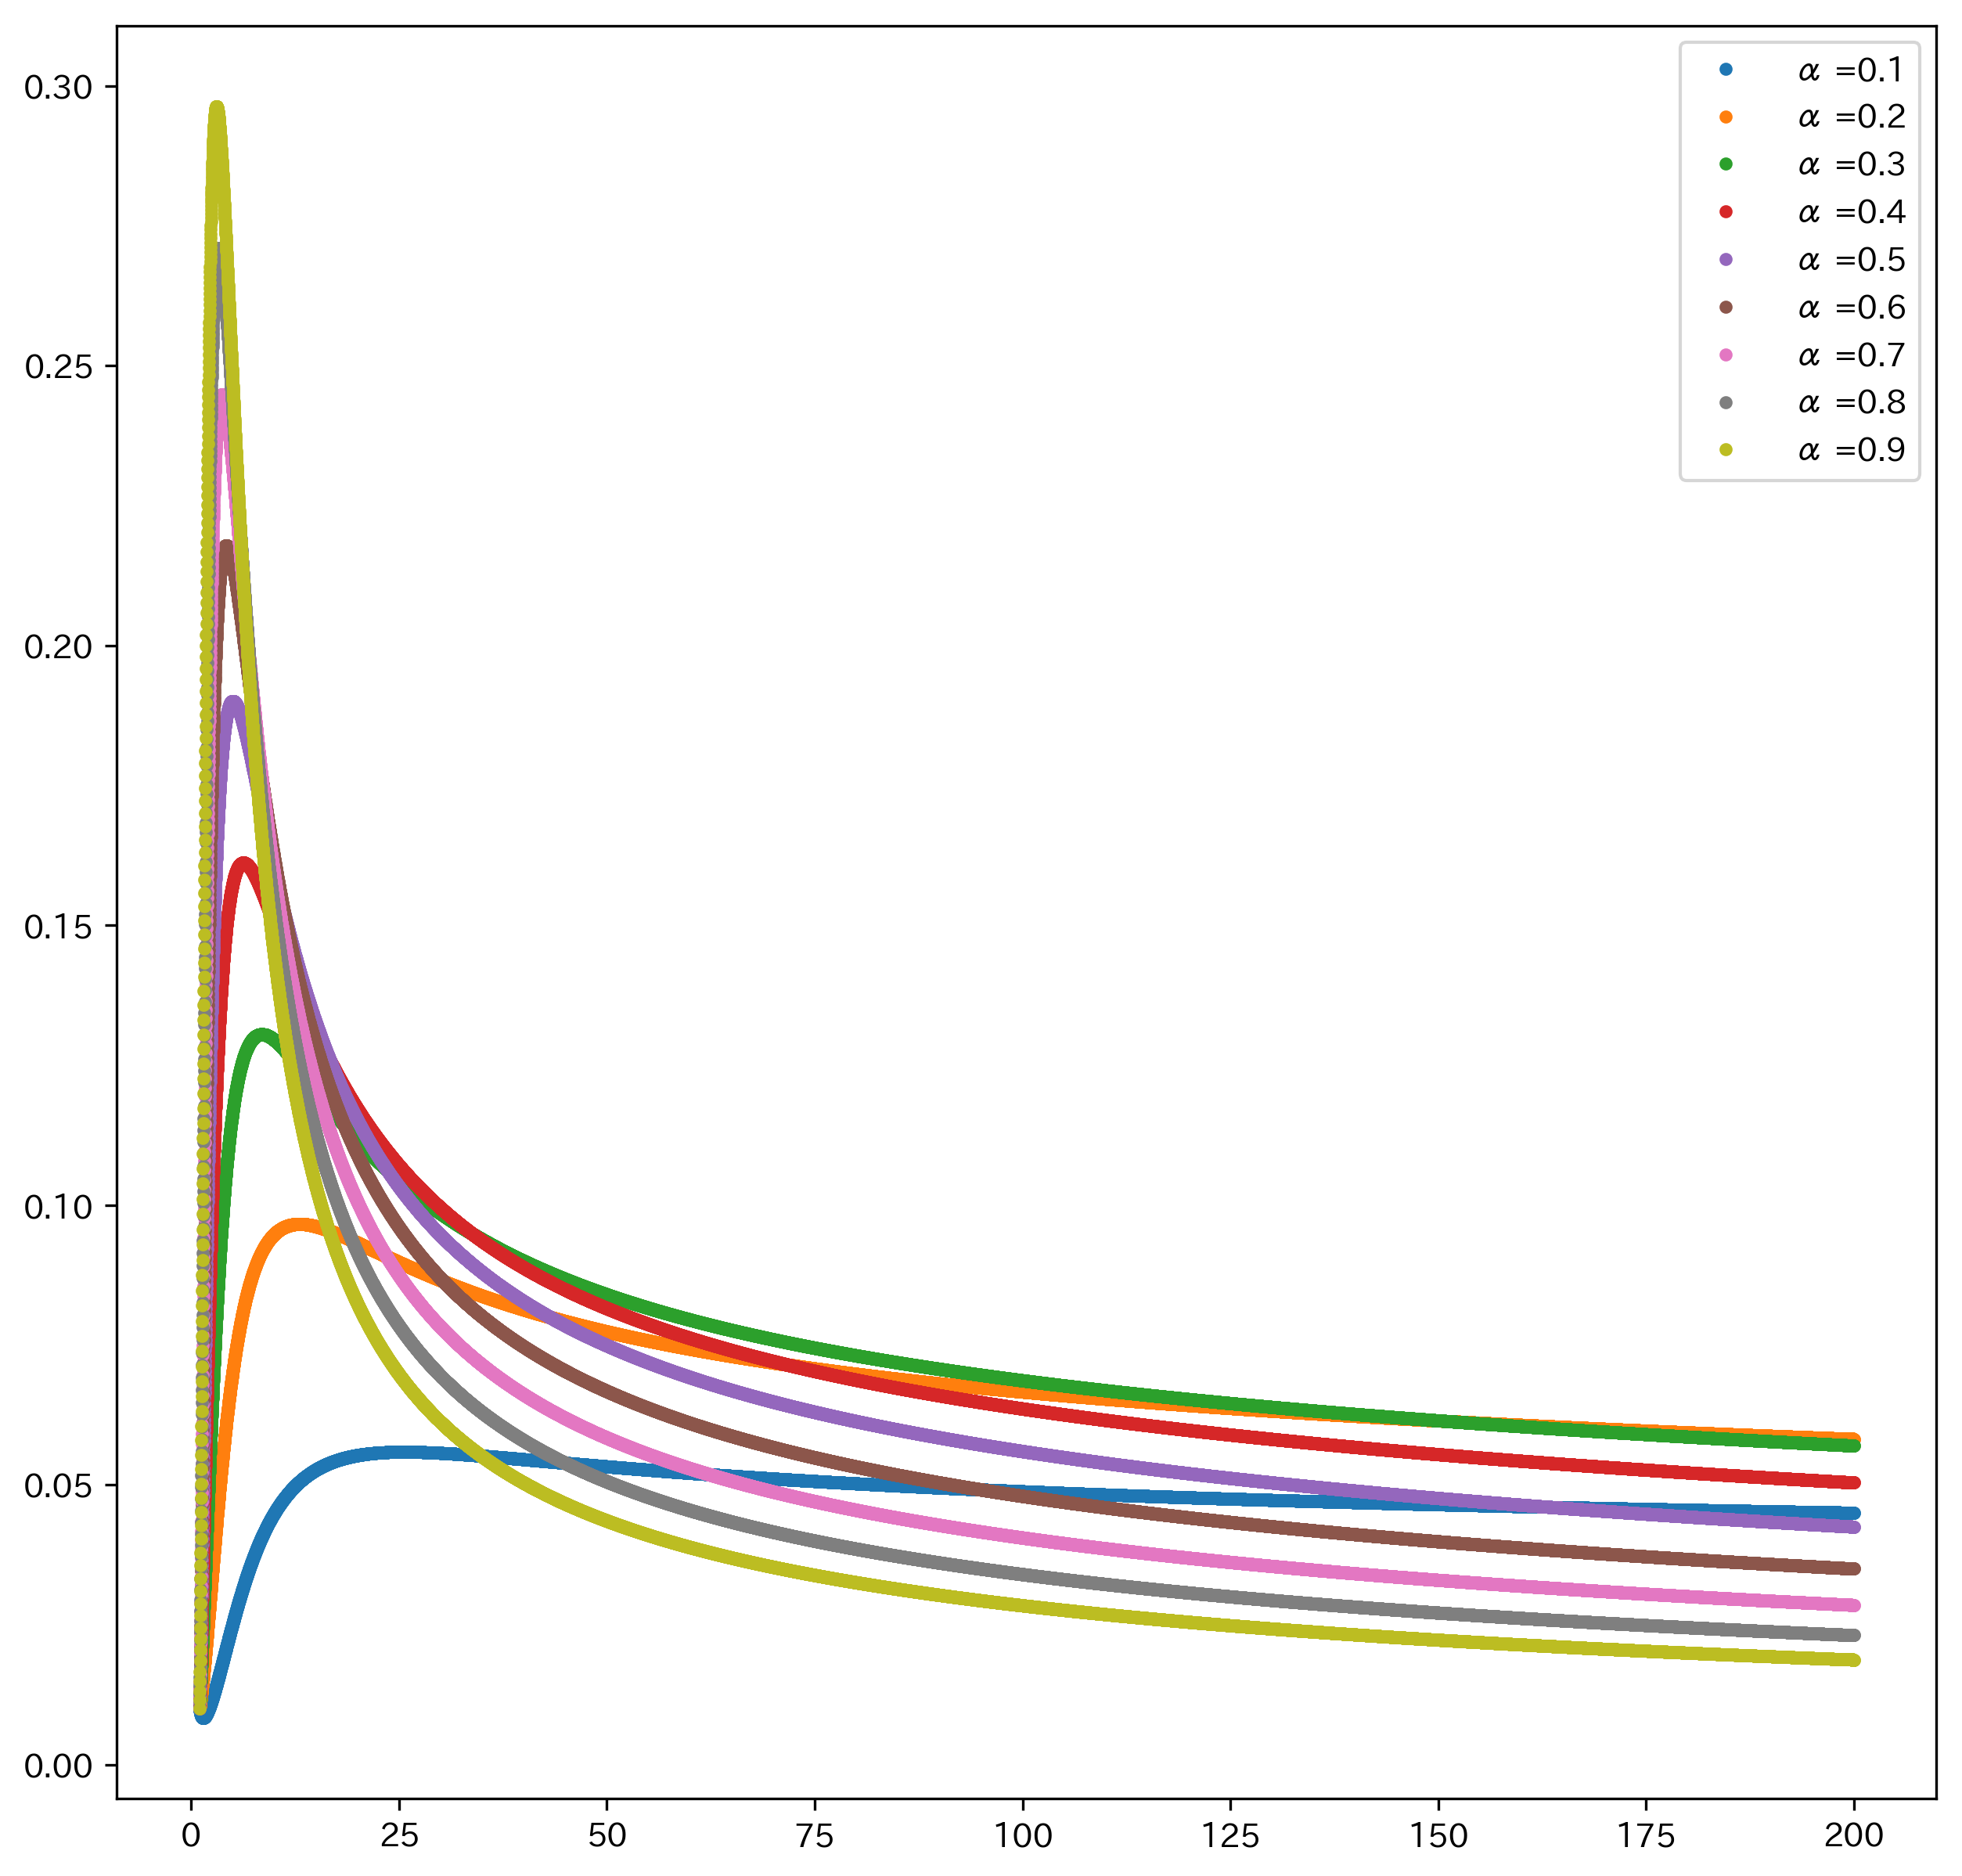

In [9]:
plt.figure(figsize=(10, 10), dpi=300)
#plt.figure(figsize=(6,3));
# We want to evaluate the system on 30 linearly
# spaced times between t=0 and t=3.
t = np.arange(1., 200.,0.01)
# We simulate the system for different values of k.
for alpha in np.arange(0.1, 1, 0.1)[:]:
    # We simulate the system and evaluate $v$ on the 
    # given times.
    v = spi.odeint(f, v0, t, args=(alpha,))
    # We plot the particle's trajectory.
    plt.plot(t, v[:,1]**2, ".",
                label=' α ={0:.1f}'.format(alpha));
#plt.plot(t[100:],1/t**2[100:],label="attractor");
plt.legend();

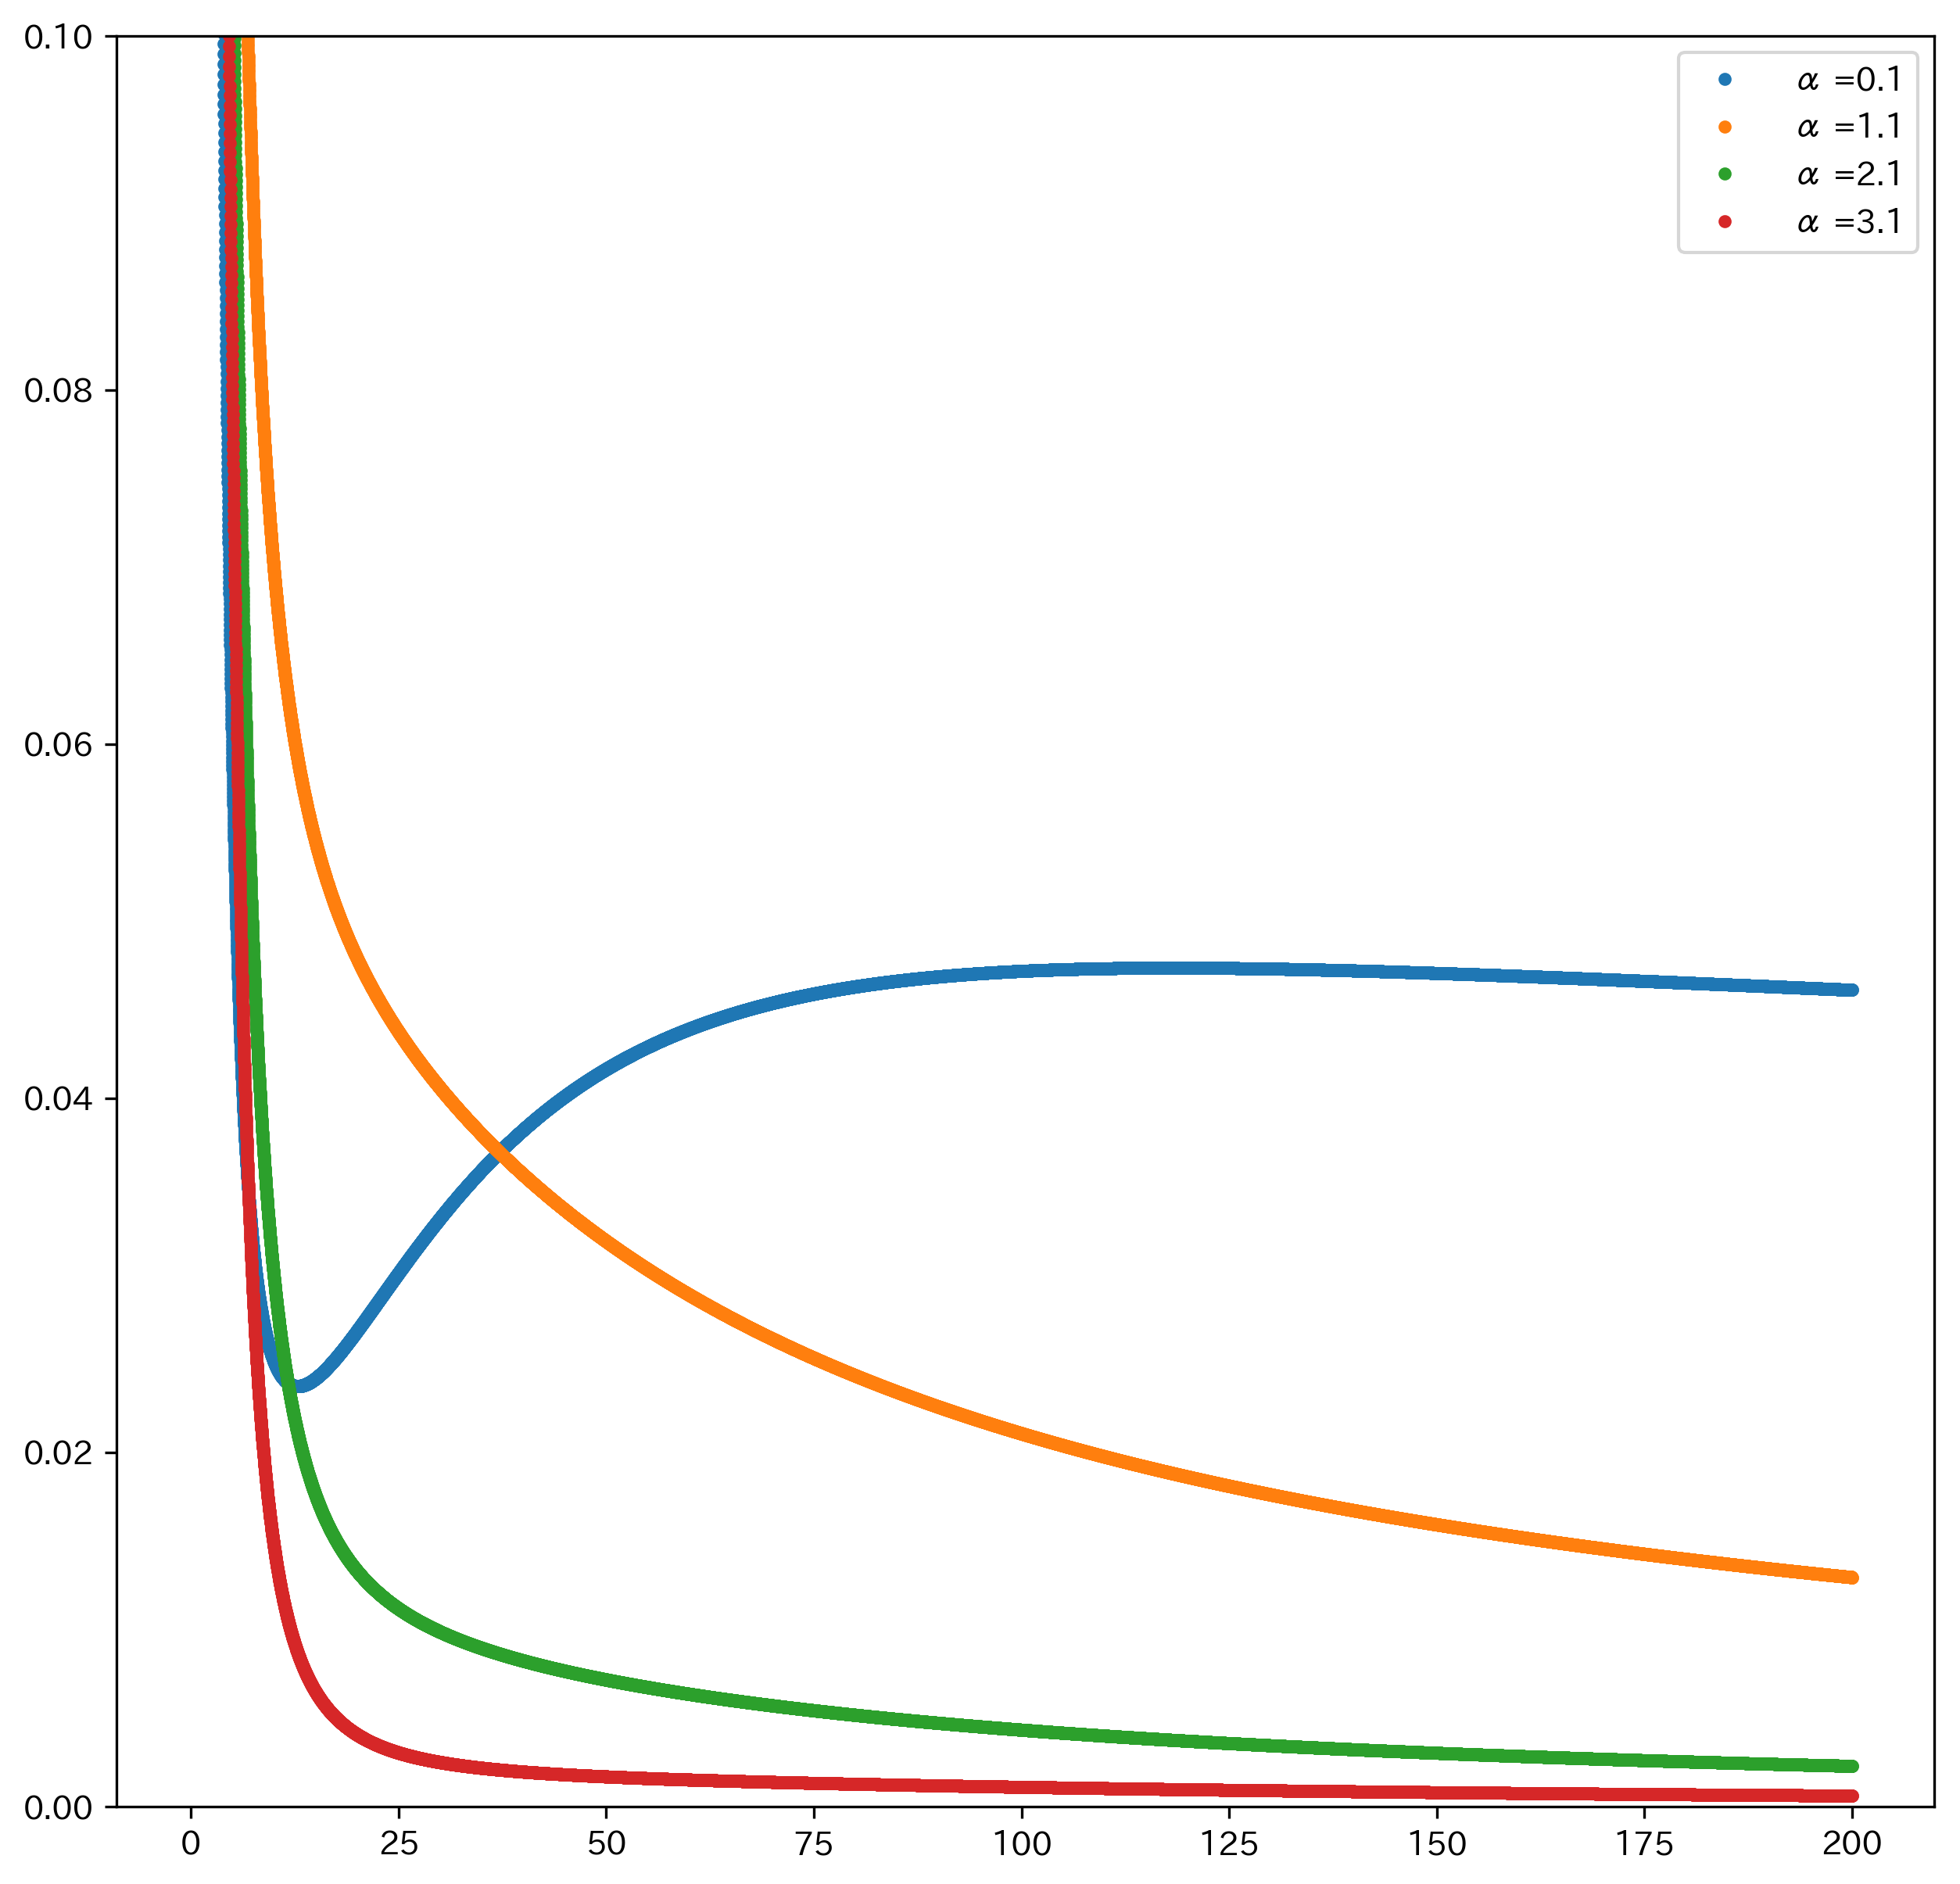

In [10]:
#### The initial position is (0, 0).
v0 = np.zeros(2)
# The initial speed vector is oriented
# to the top right.
v0[0] =1
v0[1] = 2

plt.figure(figsize=(10, 10), dpi=300)
#plt.figure(figsize=(6,3));
# We want to evaluate the system on 30 linearly
# spaced times between t=0 and t=3.
t = np.arange(1., 200.,0.01)
# We simulate the system for different values of k.
for alpha in np.arange(0.1, 4,1)[:]:
    # We simulate the system and evaluate $v$ on the 
    # given times.
    v = spi.odeint(f, v0, t, args=(alpha,))
    # We plot the particle's trajectory.
    plt.plot(t, v[:,1]**2, ".",
                label=' α ={0:.1f}'.format(alpha));
#plt.plot(t[100:],1/t**2[100:],label="attractor");
plt.legend();
plt.ylim(0,0.1)

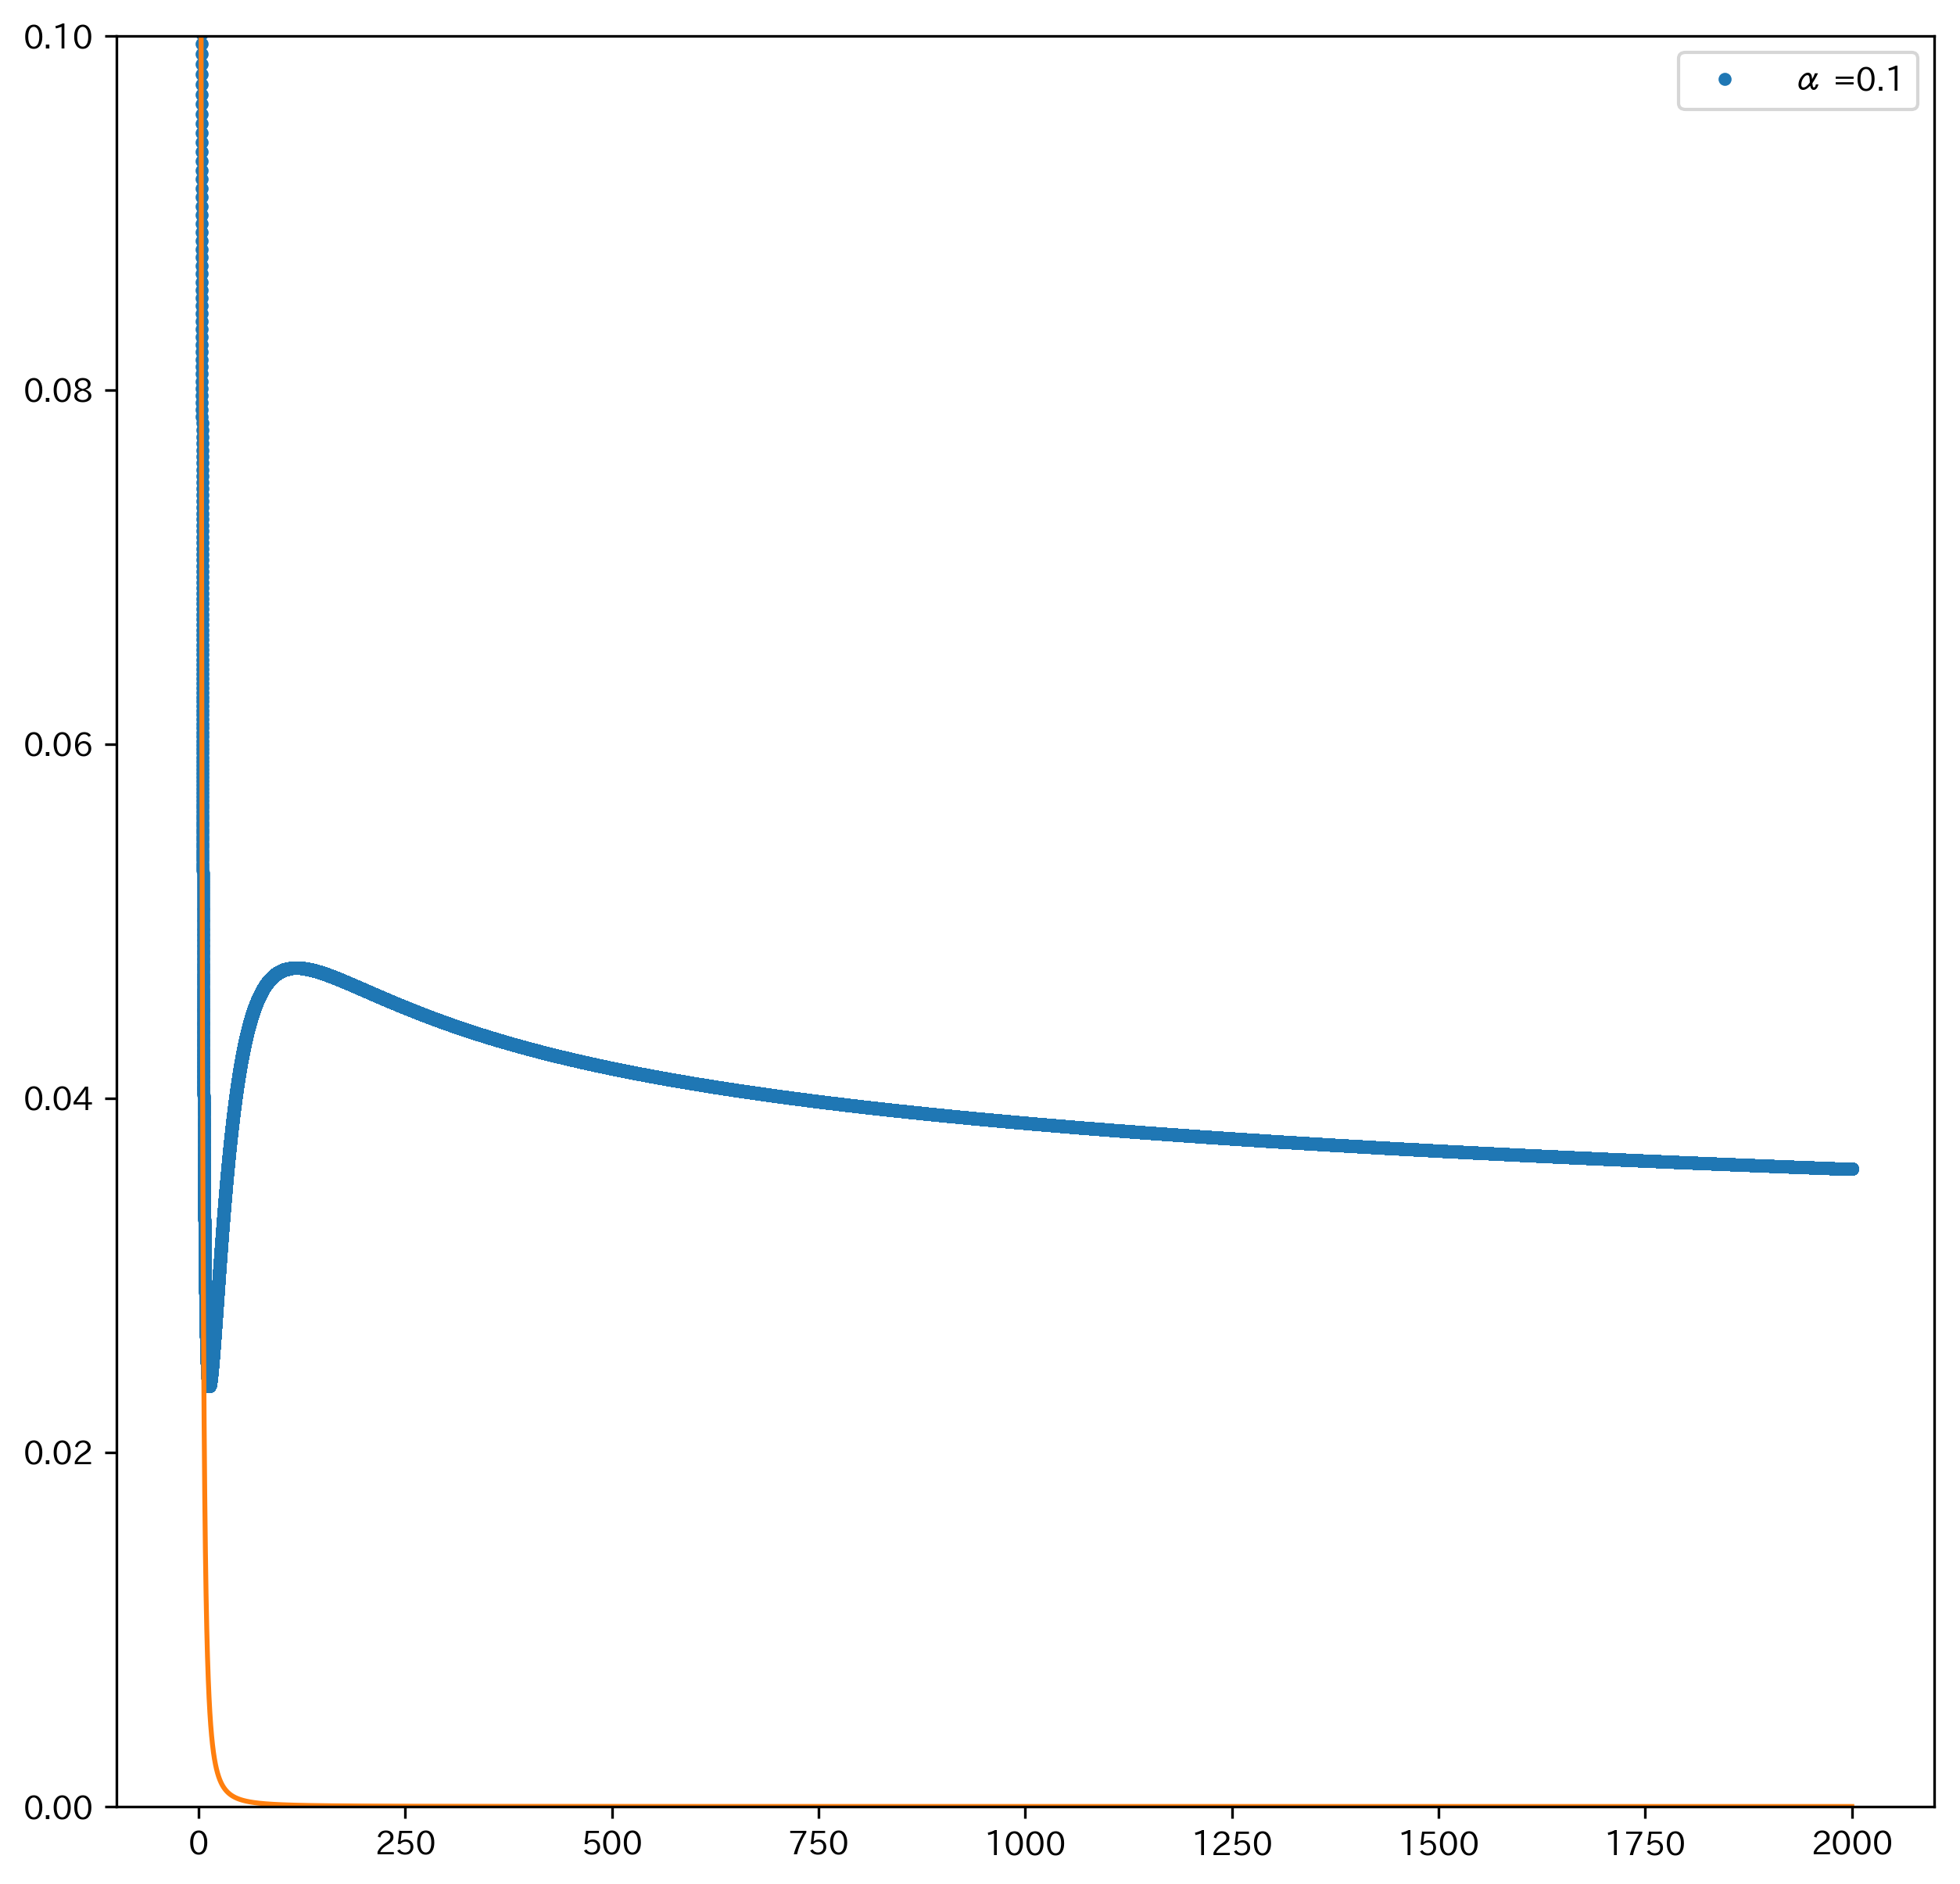

In [11]:
#### The initial position is (0, 0).
v0 = np.zeros(2)
# The initial speed vector is oriented
# to the top right.
v0[0] =1
v0[1] = 2

plt.figure(figsize=(10, 10), dpi=300)
#plt.figure(figsize=(6,3));
# We want to evaluate the system on 30 linearly
# spaced times between t=0 and t=3.
t = np.arange(1., 2000.,0.01)
# We simulate the system for different values of k.
for alpha in np.arange(0.1, 1,1)[:]:
    # We simulate the system and evaluate $v$ on the 
    # given times.
    v = spi.odeint(f, v0, t, args=(alpha,))
    # We plot the particle's trajectory.
    plt.plot(t, v[:,1]**2, ".",
                label=' α ={0:.1f}'.format(alpha));
#plt.plot(t[100:],1/t**2[100:],label="attractor");
plt.legend();
plt.ylim(0,0.1)
plt.plot(t,1/t**2)

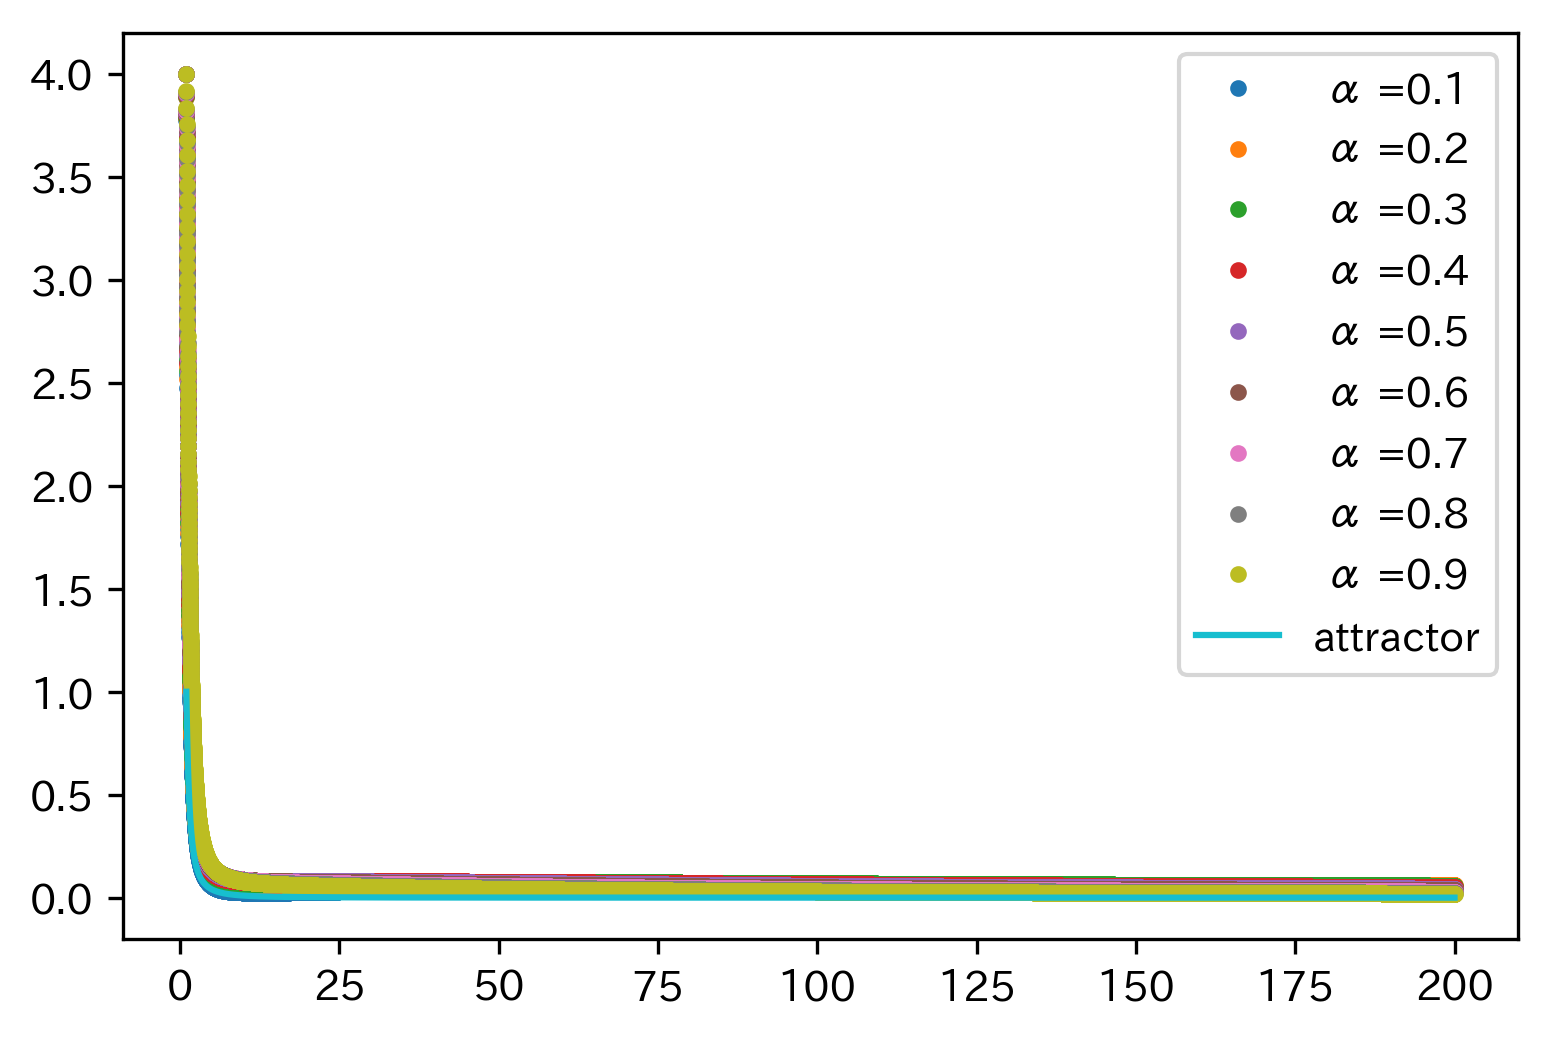

In [12]:
plt.figure(dpi=300)
#plt.figure(figsize=(6,3));
# We want to evaluate the system on 30 linearly
# spaced times between t=0 and t=3.
t = np.arange(1., 200.,0.01)
# We simulate the system for different values of k.
for alpha in np.arange(0.1, 1, 0.1)[:]:
    # We simulate the system and evaluate $v$ on the 
    # given times.
    v = spi.odeint(f, v0, t, args=(alpha,))
    # We plot the particle's trajectory.
    plt.plot(t, v[:,1]**2, ".",
                label=' α ={0:.1f}'.format(alpha));
plt.plot(t,1/t**2,label="attractor");
plt.legend();

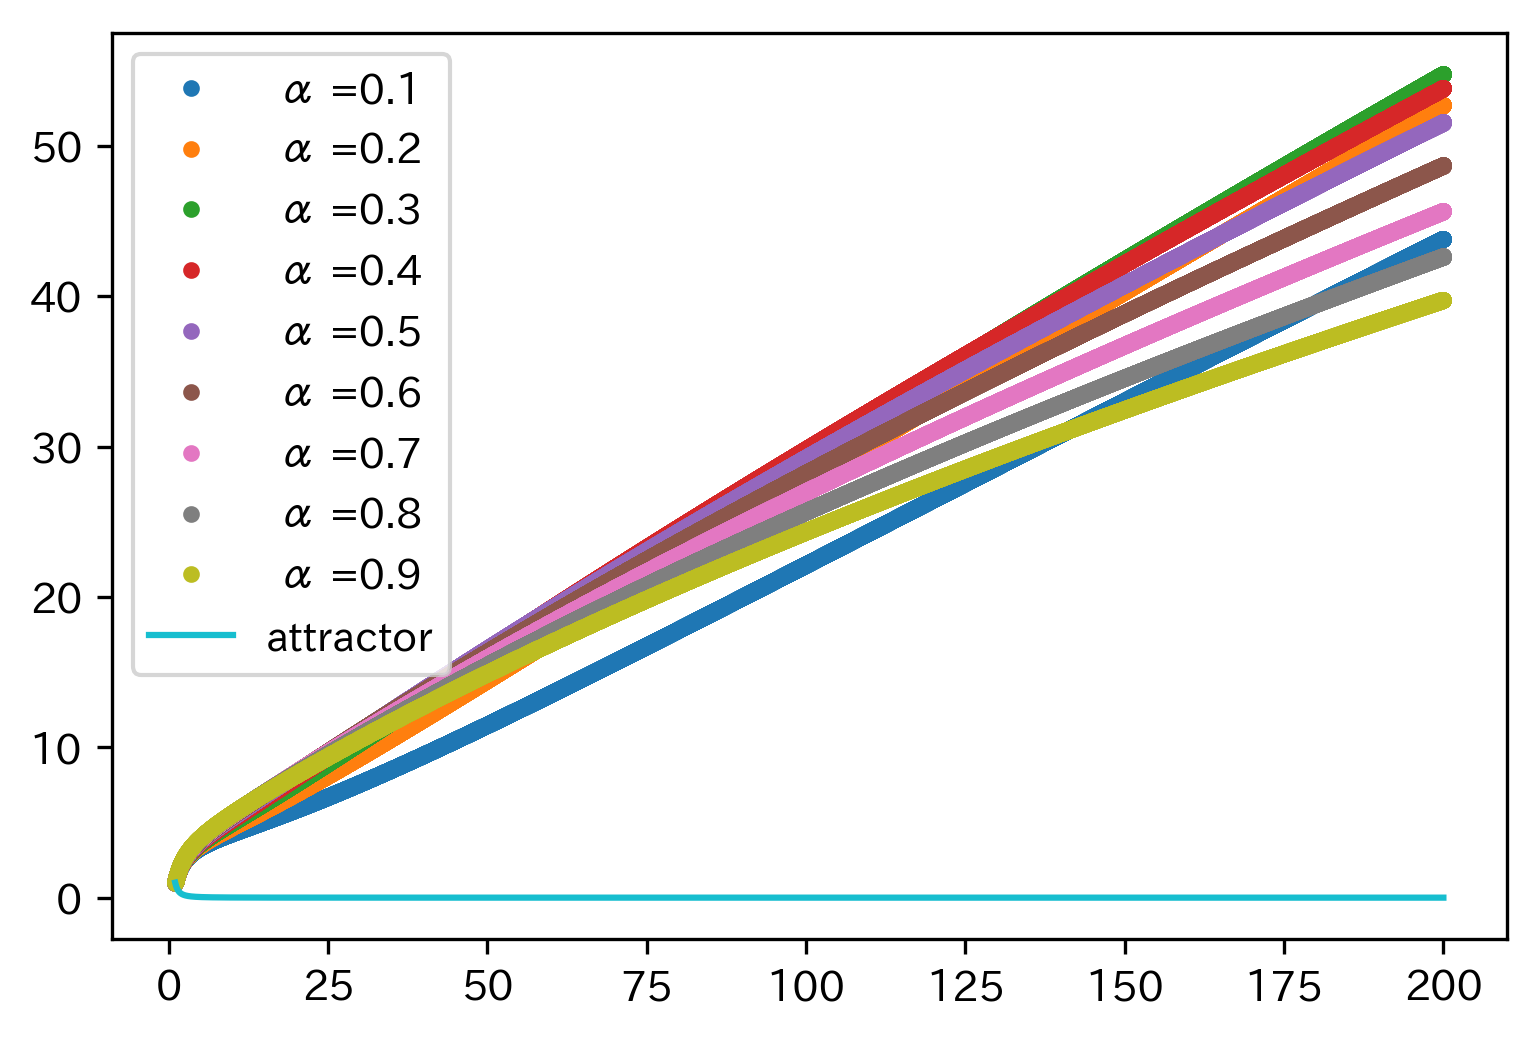

In [13]:
plt.figure(dpi=300)
#plt.figure(figsize=(6,3));
# We want to evaluate the system on 30 linearly
# spaced times between t=0 and t=3.
t = np.arange(1., 200.,0.01)
# We simulate the system for different values of k.
for alpha in np.arange(0.1, 1, 0.1)[:]:
    # We simulate the system and evaluate $v$ on the 
    # given times.
    v = spi.odeint(f, v0, t, args=(alpha,))
    # We plot the particle's trajectory.
    plt.plot(t, v[:,0], ".",
                label=' α ={0:.1f}'.format(alpha));

plt.legend();

plt.figure(dpi=300)
#plt.figure(figsize=(6,3));
# We want to evaluate the system on 30 linearly
# spaced times between t=0 and t=3.
t = np.arange(1., 1e5,1e-2)
# We simulate the system for different values of k.
for alpha in np.arange(0.1, 1, 0.1)[:]:
    # We simulate the system and evaluate $v$ on the 
    # given times.
    v = spi.odeint(f, v0, t, args=(alpha,))
    # We plot the particle's trajectory.
    plt.plot(t, v[:,0], 
                label=' α ={0:.1f}'.format(alpha));
plt.legend();

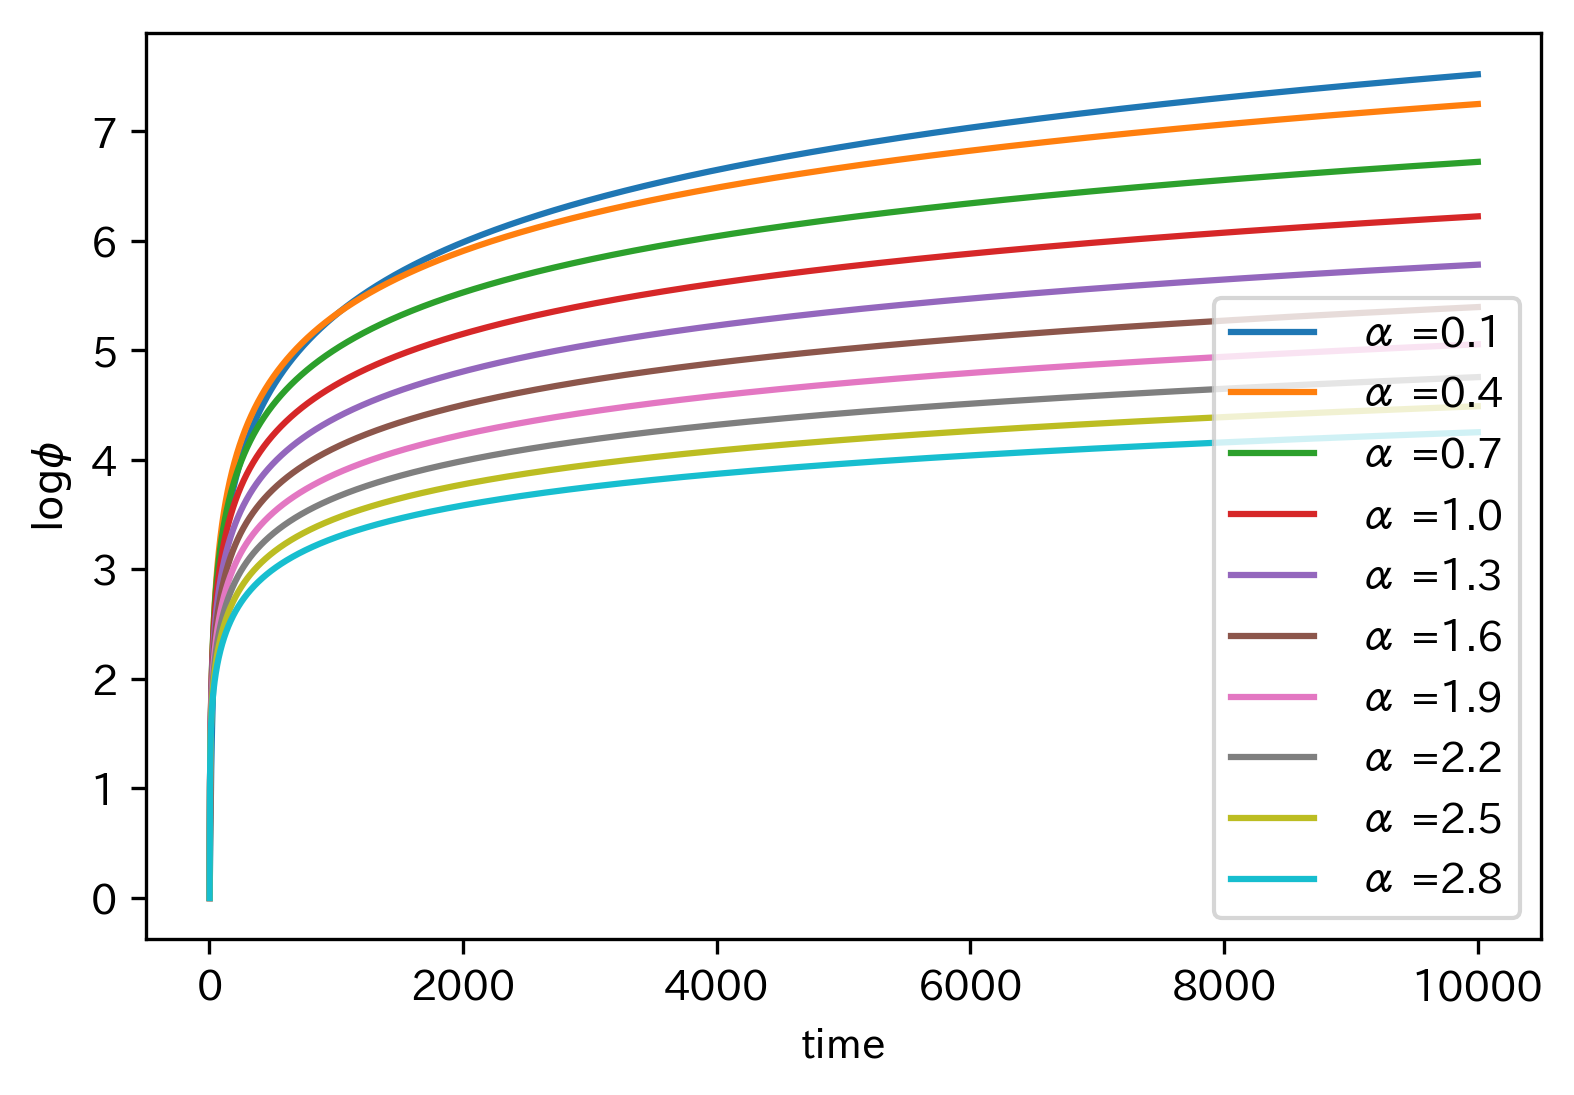

In [9]:
plt.figure(dpi=300)
#plt.figure(figsize=(6,3));
# We want to evaluate the system on 30 linearly
# spaced times between t=0 and t=3.
t = np.arange(1., 1e4,1e-2)
# We simulate the system for different values of k.
for alpha in np.arange(0.1,3, 0.3)[:]:
    # We simulate the system and evaluate $v$ on the 
    # given times.
    v = spi.odeint(f, v0, t, args=(alpha,))
    # We plot the particle's trajectory.
    plt.plot(t, np.log(v[:,0]), 
                label=' α ={0:.1f}'.format(alpha));
plt.legend();
plt.ylabel("$\log\phi$")
plt.xlabel("time")
plt.savefig("cal_log.pdf")

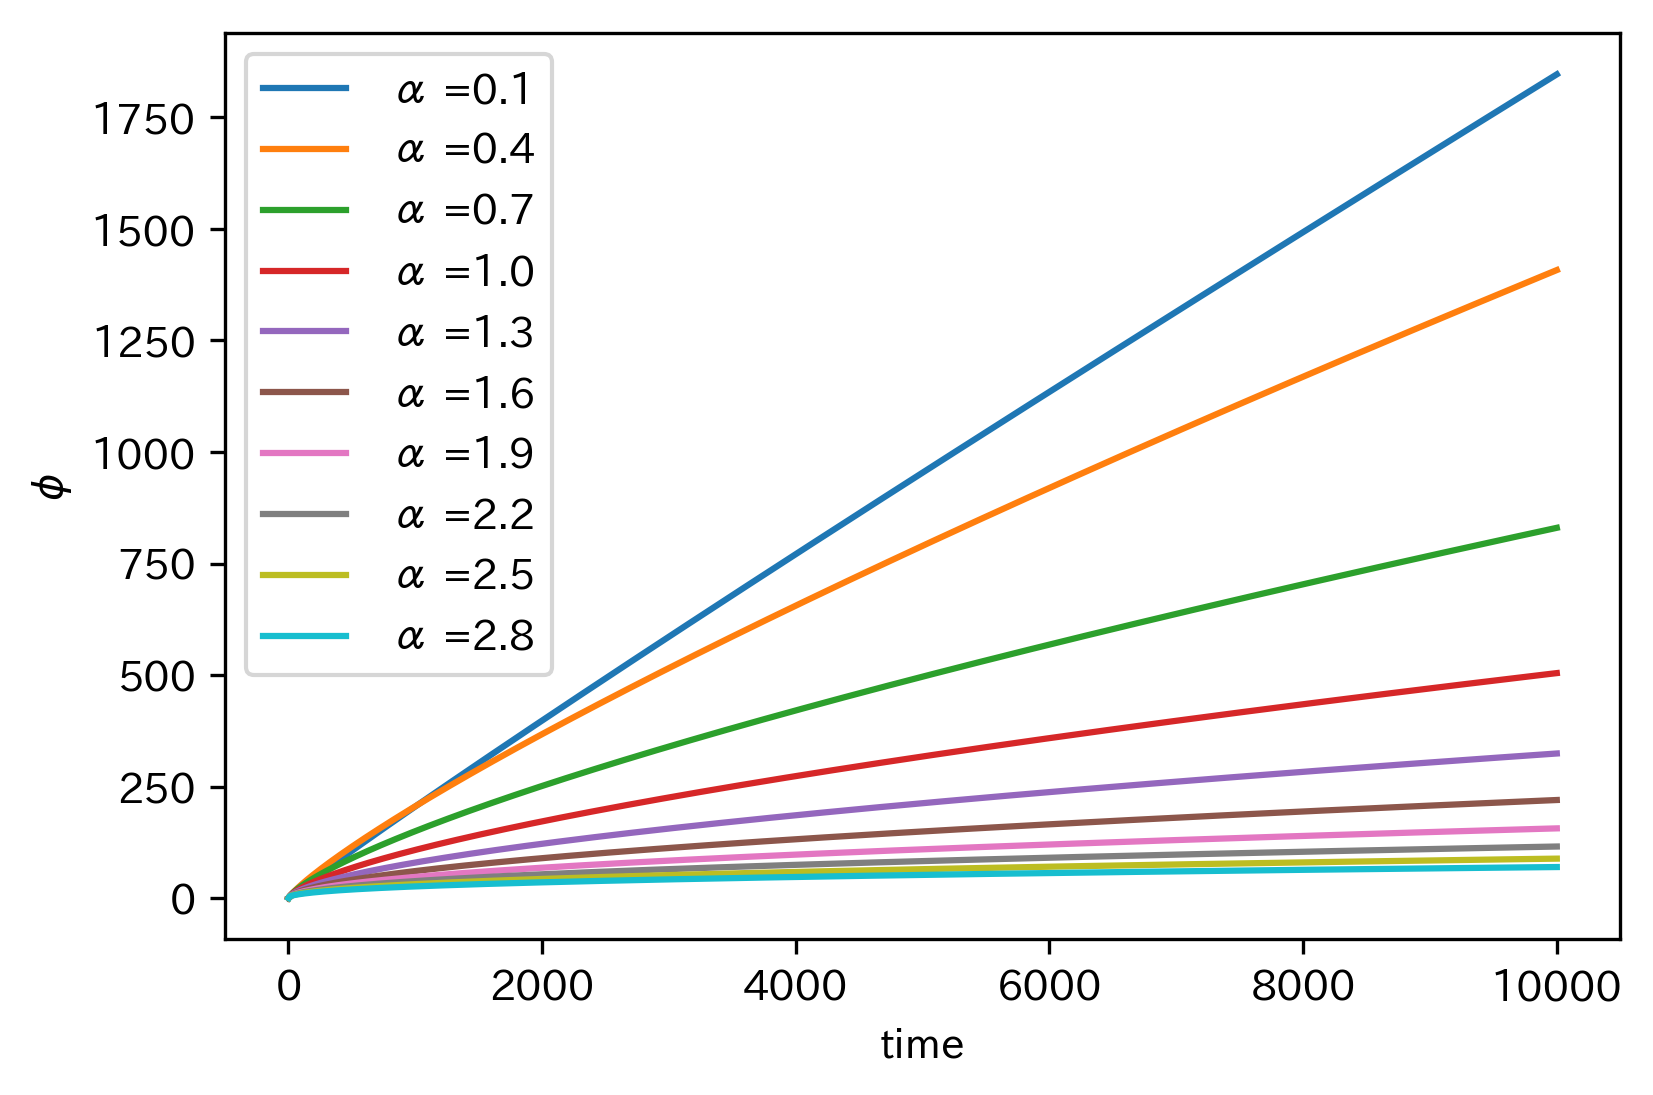

In [10]:
plt.figure(dpi=300)
#plt.figure(figsize=(6,3));
# We want to evaluate the system on 30 linearly
# spaced times between t=0 and t=3.
t = np.arange(1., 1e4,1e-2)
# We simulate the system for different values of k.
for alpha in np.arange(0.1, 3, 0.3)[:]:
    # We simulate the system and evaluate $v$ on the 
    # given times.
    v = spi.odeint(f, v0, t, args=(alpha,))
    # We plot the particle's trajectory.
    plt.plot(t, v[:,0], 
                label=' α ={0:.1f}'.format(alpha));
plt.legend();
plt.ylabel("$\phi$")
plt.xlabel("time")
plt.savefig("cal.pdf")